In [36]:
%reload_ext autoreload
%autoreload 2

In [37]:
# Change 
import sys
import os.path as path
file_path =  path.abspath(path.join("utils.py" ,"../../.."))
sys.path.append(file_path)

In [58]:
import numpy as np
from utils import Datasets

# Exercise 1 

Show (with an example) that the median and the $50^{th}$ percentile are the same

## Solution 1

In [59]:
numbers = [1022,23,23,21,31,5,5,7,8,9,0,0,3,12,325,46]
np.median(numbers) == np.percentile(numbers,50)

True

# Exercise 2

The **HR Statistics Inc.** has gathered a sample of salary data. The data includes three groups`

- `low`: salary from workers with work experience $<=5yrs$
- `medium`: salary from workers with work experience $>5yrs$ and $<=10yrs$
- `high`: salary from workers with work experience $>10yrs$

For the consulting service the company wants to understand if and how salaries differe by work experience. 

Please help them and calculate for each group:

- location parameter
- variance parameter

**Important**: try to avoid code repetition

What are your conclusions?

In [40]:
low, medium, high = Datasets.salaries()


## Solution 2

There are various way how to do this. Here is one way...

In [98]:
def make_summary(groups):
    for i in range(len(groups)):
        print()
        print("Summary for Group", i + 1)
        print("---------------------")
        print("Mean:", np.mean(groups[i]))
        print("Median:", np.median(groups[i]))
        print("Stdev:", np.std(groups[i]))
        print("Quartiles:", np.quantile(groups[i],[0.25,0.5,0.75]))

In [99]:
make_summary([low,medium,high])


Summary for Group 1
---------------------
Mean: 40309.09
Median: 41136.0
Stdev: 10347.90371533771
Quartiles: [32402.  41136.  47939.5]

Summary for Group 2
---------------------
Mean: 60262.01
Median: 59846.5
Stdev: 18997.284195113254
Quartiles: [45898.   59846.5  73902.25]

Summary for Group 3
---------------------
Mean: 81353.41
Median: 80339.5
Stdev: 13146.482363046778
Quartiles: [72708.25 80339.5  88513.75]


## Solutions 2 (outlook)

Using other modules it is even easiere to achieve similar things

In [101]:
data = {"low":low, "high":high, "medium":medium}
df = pd.DataFrame(data)
df.describe()

,low,high,medium
count,100.00,100.00,100.00
mean,"40,309.09","81,353.41","60,262.01"
std,"10,400.03","13,212.71","19,092.99"
min,"18,140.00","47,800.00","25,384.00"
25%,"32,402.00","72,708.25","45,898.00"
50%,"41,136.00","80,339.50","59,846.50"
75%,"47,939.50","88,513.75","73,902.25"
max,"61,488.00","121,011.00","119,261.00"


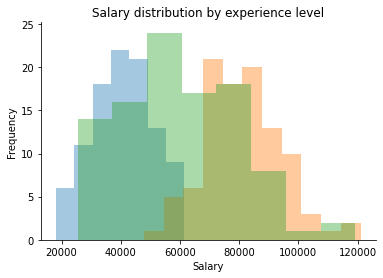

In [90]:
for col_name in df.columns:
    sns.distplot(df[col_name], kde=False)
sns.despine()
plt.ylabel("Frequency")
plt.xlabel("Salary")
plt.title("Salary distribution by experience level");